# Particle Swarm Optimization (PSO)

$$v_{i,j} = w * v_{i,j} + c_1 * r_1 * (p_{i,j} - x_{i,j}) + c_2 * r_2 * (g_j - x_{i,j})$$

$$x_{i,j} = x_{i,j} + v_{i,j}$$


- $v_{i,j}$ is the speed of particle i in dimension j.

- $w$ It is the inertia factor that controls the influence of the previous speed on the new speed.

- $c_1$ and $c_2$ are the cognitive and social acceleration factors, respectively, that control the influence of the best individual position and the best global position on the new speed.

- $r_1$ y $r_2$ are uniformly generated random numbers in the range [0, 1].

- $p_{i,j}$ is the best individual position found by particle i in dimension j.

- $g_j$ is the best global position found by any particle in dimension j.

- $x_{i,j}$ is the current position of particle i in dimension j.

In [ ]:
import numpy as np

class PSO():

  def __init__(self,ran, vij = 0, w = 0.72, c1 = 2, c2 = 2,n_particles = 20,max_iter = 20,minimize = True):
    self.ran = ran
    self.vij = vij
    self.w = w
    self.c1 = c1
    self.c2 = c2
    self.max_iter = max_iter
    self.n_particles = n_particles
    self.minimize = minimize

  def initial_particles(self):
    particles = np.zeros((self.n_particles,len(self.ran)),dtype=np.float64)

    for i in range(len(self.ran)):
      particles[:,i] = np.random.uniform(self.ran[i][0], self.ran[i][1], self.n_particles)

    return particles

  def particle_speed(self,particles, pij, g, vij):
    v_new = self.w * vij + self.c1 *np.random.rand(1) * (pij - particles) + self.c2 * np.random.rand(1)[0] * (g - particles)
    return v_new

  def run_pso(self,fitness_function):
    particles = self.initial_particles()

    pij = particles

    if self.minimize == False:
      fitness_vector = -1*fitness_function(particles)
    else:
      fitness_vector = fitness_function(particles)

    fitness = np.zeros((self.max_iter + 1,self.n_particles),dtype=np.float64)
    fitness[0,] = fitness_vector

    best_fitness = np.where(fitness_vector == np.min(fitness_vector))[0][0]
    g = particles[best_fitness,]

    historical = [particles]

    vij = 0
    for i in range(self.max_iter):
      vij = self.particle_speed(particles = particles, pij = pij, g = g, vij = vij)
      particles = particles + vij

      if self.minimize == False:
        fitness_vector = -1*fitness_function(particles)
      else:
        fitness_vector = fitness_function(particles)


      fitness[i+1,] = fitness_vector

      for j in range(self.n_particles):
        if (fitness[i + 1,j] < fitness[i,j]):
          pij[j,] =  particles[j,]

      if (min(fitness[i + 1,]) < best_fitness):
        g = particles[np.where(fitness[i+1,] == np.min(fitness[i+1,]))[0][0],]
        best_fitness = np.min(fitness[i + 1,])

      historical.append(particles)



    return [particles, historical,fitness[i+1,]]


### Now, let's test the algorithm with the following function

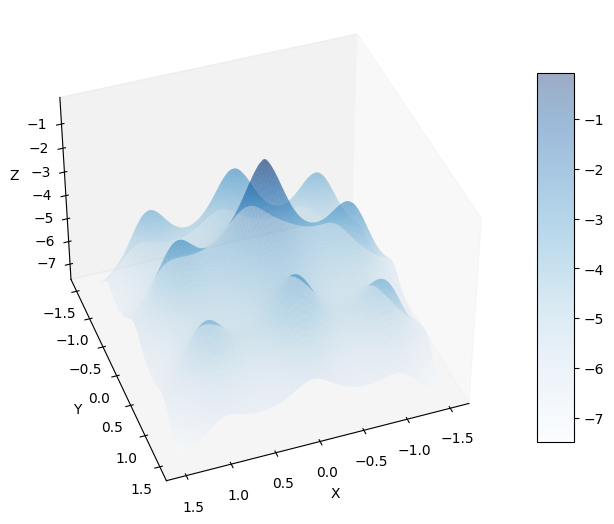

In [225]:
def func(x, y):
    return -1*(-20 * np.exp(-0.2 * np.sqrt(0.5 * (x**2 + y**2))) - np.exp(0.5 * (np.cos(2*np.pi*x) + np.cos(2*np.pi*y))) + 20 + np.exp(1))



x = np.linspace(-1.5, 1.5, 100)
y = np.linspace(-1.5, 1.5, 100)
X, Y = np.meshgrid(x, y)
Z = func(X, Y)

fig = plt.figure(figsize=(8, 8))
ax = fig.add_subplot(111, projection='3d')
ax.view_init(elev=40, azim= 70)
ax.set_xlabel('X')
ax.set_ylabel('Y')
ax.set_zlabel('Z')
ax.grid(False)

# Grafica la función
surf = ax.plot_surface(X, Y, Z, cmap='Blues', edgecolor='None',alpha=0.4,rstride=1, cstride=1,shade=True)
cbar = fig.colorbar(surf, ax=ax, shrink=0.6, aspect=10)

plt.show()


### We want to maximize Z

In [209]:
def obj(particles):
    x = particles[:,0]
    y = particles[:,1]
    return -1*(-20 * np.exp(-0.2 * np.sqrt(0.5 * (x**2 + y**2))) - np.exp(0.5 * (np.cos(2*np.pi*x) + np.cos(2*np.pi*y))) + 20 + np.exp(1))

In [211]:
n_particles =  20
max_iter = 20
pso = PSO(ran = [[-1.5,1.5],[-1.5,1.5]],n_particles = n_particles,max_iter=max_iter, c1 = 0.8, c2 = 0.8,minimize=False)
res = pso.run_pso(fitness_function = obj)


In [212]:
best_sol = res[0][np.argmin(res[2])]
best_sol

array([-0.00121003,  0.00128078])

In [226]:
def update_points(frame, points, positions):
    x_points = positions[frame][:,0]
    y_points = positions[frame][:,1]
    z_points = func(x_points, y_points)
    points.set_data(x_points, y_points)
    points.set_3d_properties(z_points)


points, = ax.plot([], [], [], 'ro', markersize = 2)

ani = FuncAnimation(fig, update_points, frames = len(res[1]), fargs=(points, res[1]), interval=800, blit=False)

ani.save('plot.gif', writer='imagemagick')

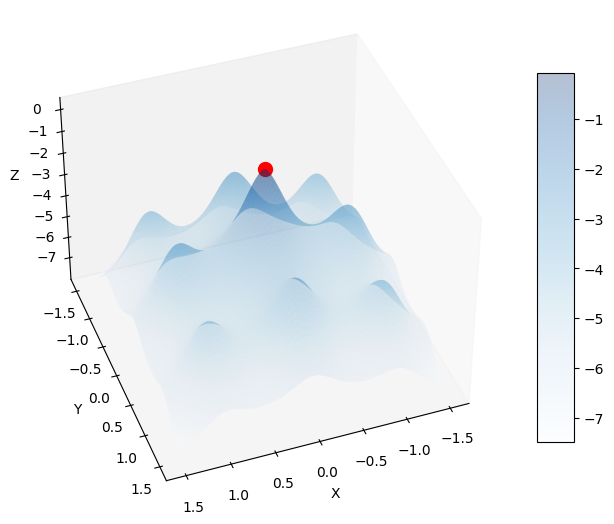

In [223]:
fig = plt.figure(figsize=(8, 8))
ax = fig.add_subplot(111, projection='3d')
ax.view_init(elev=40, azim= 70)
ax.set_xlabel('X')
ax.set_ylabel('Y')
ax.set_zlabel('Z')
ax.grid(False)


point_x = best_sol[0]
point_y = best_sol[1]
point_z = func(point_x, point_y)
ax.scatter(point_x, point_y, point_z, color='red', s=100, label='Punto de interés')

surf = ax.plot_surface(X, Y, Z, cmap='Blues', edgecolor='None',alpha=0.3,rstride=1, cstride=1,shade=True)
cbar = fig.colorbar(surf, ax=ax, shrink=0.6, aspect=10)